<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EXP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = pd.DataFrame({
    'date': date_range,
    'value': np.random.randn(100).cumsum() + 100  # Simulated time series data
})

In [3]:
data.set_index('date', inplace=True)

In [4]:
window_size = 7  # 7-day moving average
data['smoothed'] = data['value'].rolling(window=window_size).mean()

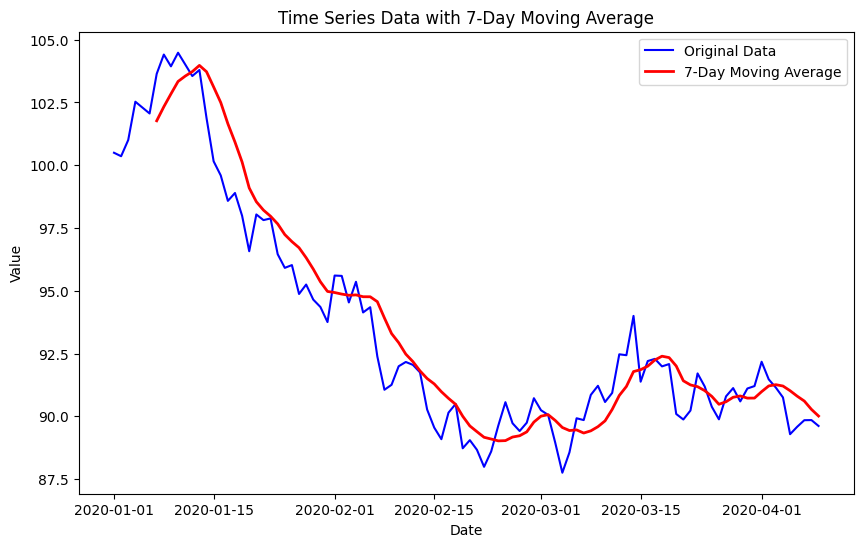

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['value'], label='Original Data', color='blue')
plt.plot(data['smoothed'], label=f'{window_size}-Day Moving Average', color='red', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.show()

In [6]:
data['lag_1'] = data['smoothed'].shift(1)
data['lag_2'] = data['smoothed'].shift(2)


In [7]:
data.dropna(inplace=True)


In [8]:
X = data[['lag_1', 'lag_2']]
y = data['smoothed']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.02385469561624267


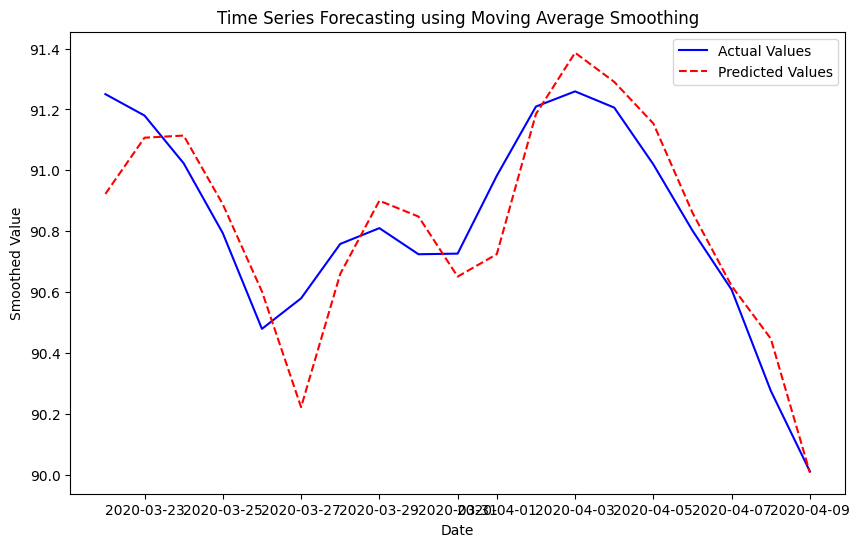

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Values', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Smoothed Value')
plt.title('Time Series Forecasting using Moving Average Smoothing')
plt.show()